Projektinis darbas

Pirma dalis: tabular data

In [91]:
# Failų sistemos administravimui
import time, os

# Duomenų manipuliacijai
import numpy as np
import pandas as pd

# Vizualizacijai
import matplotlib.pyplot as plt
import seaborn as sns

# Missing data imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Categorical data encoding
from sklearn.preprocessing import LabelEncoder

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Resampling
import imblearn
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Modelio sukurimui
from sklearn import metrics

# Warning suppression
import warnings

warnings.filterwarnings("ignore")

Duomenys (Data)

In [92]:
import pandas as pd

data = pd.read_excel(r"WEOOct2022all_copy.xlsx")

In [93]:
# Printing the top rows
data.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1319.9,1288.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1469.6,1547.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


Pagrindinių duomenų tyrinėjimas (Basic Data Exploration)

In [94]:
# Shape of the data
print("Shape of the data: {}".format(data.shape))

Shape of the data: (8626, 58)


### 5.1 TOP10 šalių, kurių BVP vienam asmeniui augimas yra dižiausias

In [95]:
df = data.copy()

In [96]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8626 entries, 0 to 8625
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               8625 non-null   object 
 1   ISO                            8624 non-null   object 
 2   WEO Subject Code               8624 non-null   object 
 3   Country                        8624 non-null   object 
 4   Subject Descriptor             8624 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8624 non-null   object 
 7   Scale                          3920 non-null   object 
 8   Country/Series-specific Notes  7641 non-null   object 
 9   1980                           3886 non-null   object 
 10  1981                           4007 non-null   object 
 11  1982                           4050 non-null   object 
 12  1983                           4091 non-null   o

In [97]:
n_columns = [
    "Country/Series-specific Notes",
    1980,
    1981,
    1982,
    1983,
    1984,
    1985,
    1986,
    1987,
    1988,
    1989,
    1990,
    1991,
    1992,
    1993,
    1994,
    1995,
    1996,
    1997,
    1998,
    1999,
    2000,
    2002,
    2003,
    2004,
    2005,
    2006,
    2007,
    2008,
    2010,
    2011,
    2012,
    2013,
    2014,
    2015,
    2016,
    2017,
    2018,
    2019,
    2020,
    2022,
    2023,
    2024,
    2025,
    2026,
    2026,
    2027,
    "Estimates Start After",
]
df.drop(n_columns, inplace=True, axis=1)

In [98]:
# df.drop(df[df['WEO Subject Code'] <> 'NGDPD'].index, inplace = True)
# print(df)
df1 = df[~(df["WEO Subject Code"] == "NGDPDPC")].index
df.drop(df1, inplace=True)

In [99]:
df.dropna()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,2001,2009,2021
53,914,ALB,NGDPDPC,Albania,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1283.57,4114.09,6373.3
97,612,DZA,NGDPDPC,Algeria,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1768.58,3890.52,3659.53
185,614,AGO,NGDPDPC,Angola,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,619.697,3146.8,2352.13
229,311,ATG,NGDPDPC,Antigua and Barbuda,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,10411.42,14688.68,14809.48
273,213,ARG,NGDPDPC,Argentina,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,8085.36,8337.81,10616.95
...,...,...,...,...,...,...,...,...,...,...,...
8413,582,VNM,NGDPDPC,Vietnam,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,513.197,1481.44,3717.8
8457,487,WBG,NGDPDPC,West Bank and Gaza,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1275.69,2061.56,3450.57
8501,474,YEM,NGDPDPC,Yemen,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,535.776,1093.81,644.153
8545,754,ZMB,NGDPDPC,Zambia,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,356.323,1135.01,1095.47


In [100]:
df = df.dropna()

In [101]:
#df

In [102]:
# Pasitikriname ar yra NaN reikšmių;
# Joms esant, neleidžia priskirti float tipo skaitinėms reikšmėms
df1 = df[df.isna().any(axis=1)]
print(df1)

Empty DataFrame
Columns: [WEO Country Code, ISO, WEO Subject Code, Country, Subject Descriptor, Subject Notes, Units, Scale, 2001, 2009, 2021]
Index: []


In [103]:
#df_max=df.sort_values(2021, ascending=False).head(10)
#df_max.head()


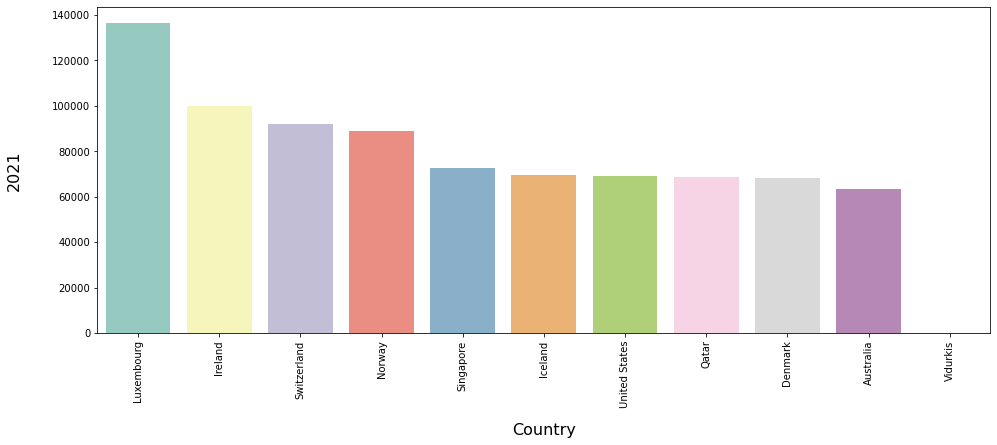

In [104]:
fig, ax = plt.subplots(figsize=(16, 6))
top_gdp_countries = df.sort_values(2021, ascending=False).head(10)
#mean = pd.DataFrame({"Country": ["Vidurkis"], "2021": [df[2021].mean()]})
gdps = pd.concat([top_gdp_countries[["Country", 2021]], mean], ignore_index=True)
sns.barplot(x="Country", y=2021, data=gdps, palette="Set3")
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [105]:
df[2021] = df[2021].astype(float)

In [106]:
df[2001] = df[2001].astype(float)

In [107]:
df["augimas_kartais"] = df[2021] / df[2001]

In [108]:
df["augimas_sumine išraiška"] = df[2021] - df[2001]

In [122]:
df.mean()

WEO Country Code             524.574324
2001                        8358.944081
2009                       15206.494149
2021                       19716.798041
augimas_kartais                3.237733
augimas_sumine išraiška    11357.853959
dtype: float64

In [109]:
df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,2001,2009,2021,augimas_kartais,augimas_sumine išraiška
53,914,ALB,NGDPDPC,Albania,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1283.570,4114.09,6373.300,4.965292,5089.730
97,612,DZA,NGDPDPC,Algeria,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1768.580,3890.52,3659.530,2.069191,1890.950
185,614,AGO,NGDPDPC,Angola,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,619.697,3146.8,2352.130,3.795613,1732.433
229,311,ATG,NGDPDPC,Antigua and Barbuda,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,10411.420,14688.68,14809.480,1.422427,4398.060
273,213,ARG,NGDPDPC,Argentina,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,8085.360,8337.81,10616.950,1.313108,2531.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,582,VNM,NGDPDPC,Vietnam,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,513.197,1481.44,3717.800,7.244392,3204.603
8457,487,WBG,NGDPDPC,West Bank and Gaza,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1275.690,2061.56,3450.570,2.704866,2174.880
8501,474,YEM,NGDPDPC,Yemen,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,535.776,1093.81,644.153,1.202280,108.377
8545,754,ZMB,NGDPDPC,Zambia,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,356.323,1135.01,1095.470,3.074374,739.147


In [110]:
#df.drop(df[df[2021] < 2000].index, inplace=True)

In [111]:
df_sorted = df.sort_values("augimas_kartais", ascending=False).head(10)

In [112]:
df_sorted

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,2001,2009,2021,augimas_kartais,augimas_sumine išraiška
1593,924,CHN,NGDPDPC,China,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1044.960,3813.41,12561.69,12.021216,11516.730
5025,921,MDA,NGDPDPC,Moldova,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,505.784,1890.65,5284.91,10.448947,4779.126
5069,948,MNG,NGDPDPC,Mongolia,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,521.317,1687.55,4482.85,8.599087,3961.533
6257,968,ROU,NGDPDPC,Romania,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1802.680,8517.6,14794.86,8.207147,12992.180
2517,644,ETH,NGDPDPC,Ethiopia,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,123.892,351.341,995.67,8.036596,871.778
493,912,AZE,NGDPDPC,Azerbaijan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,674.783,4963.77,5397.93,7.999505,4723.147
5245,518,MMR,NGDPDPC,Myanmar,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,154.588,632.23,1216.81,7.871310,1062.222
4145,544,LAO,NGDPDPC,Lao P.D.R.,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,324.750,1045.98,2513.24,7.738999,2188.490
8413,582,VNM,NGDPDPC,Vietnam,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,513.197,1481.44,3717.80,7.244392,3204.603
3837,916,KAZ,NGDPDPC,Kazakhstan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1491.650,7116.37,10306.20,6.909262,8814.550


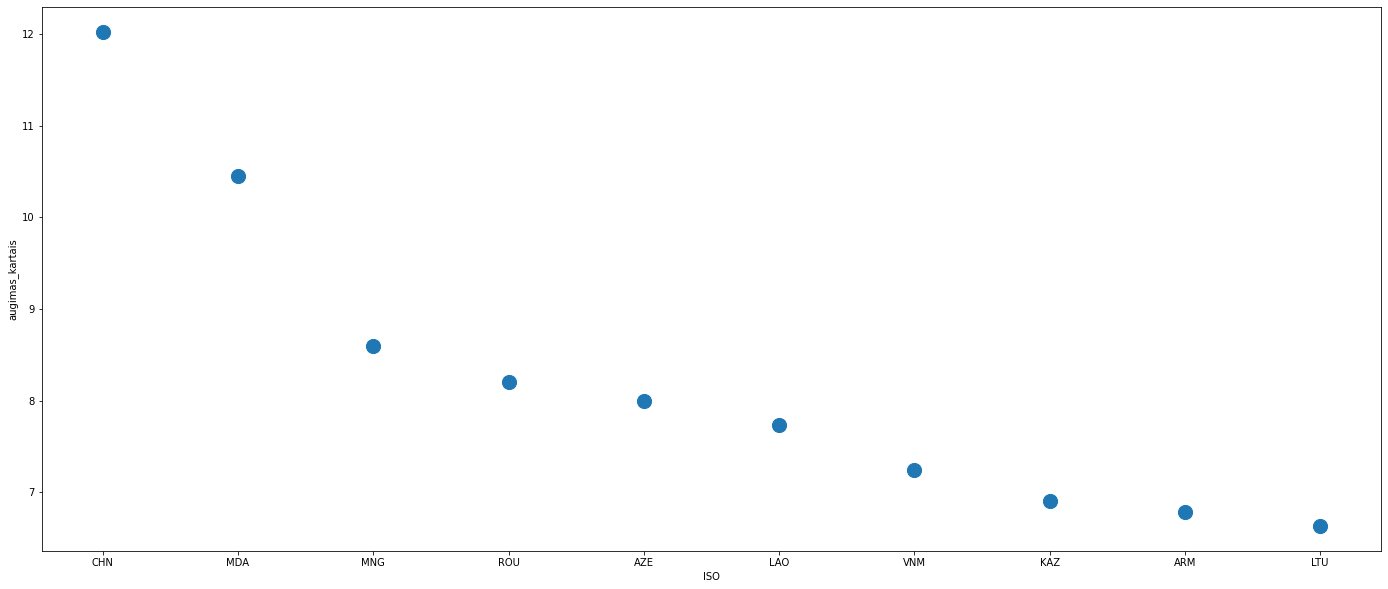

In [134]:
df_sorted.plot.scatter(x="ISO", y=("augimas_kartais"), s=200)
plt.show(100, 60)

In [114]:
df.drop(df[df[2021] < 2000].index, inplace=True)
df_sorted = df.sort_values("augimas_kartais", ascending=False).head(10)
df_sorted

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,2001,2009,2021,augimas_kartais,augimas_sumine išraiška
1593,924,CHN,NGDPDPC,China,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1044.960,3813.41,12561.69,12.021216,11516.730
5025,921,MDA,NGDPDPC,Moldova,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,505.784,1890.65,5284.91,10.448947,4779.126
5069,948,MNG,NGDPDPC,Mongolia,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,521.317,1687.55,4482.85,8.599087,3961.533
6257,968,ROU,NGDPDPC,Romania,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1802.680,8517.6,14794.86,8.207147,12992.180
493,912,AZE,NGDPDPC,Azerbaijan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,674.783,4963.77,5397.93,7.999505,4723.147
4145,544,LAO,NGDPDPC,Lao P.D.R.,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,324.750,1045.98,2513.24,7.738999,2188.490
8413,582,VNM,NGDPDPC,Vietnam,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,513.197,1481.44,3717.80,7.244392,3204.603
3837,916,KAZ,NGDPDPC,Kazakhstan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,1491.650,7116.37,10306.20,6.909262,8814.550
317,911,ARM,NGDPDPC,Armenia,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,692.287,2911.76,4701.48,6.791230,4009.193
4409,946,LTU,NGDPDPC,Lithuania,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,3525.850,11848.2,23385.93,6.632707,19860.080


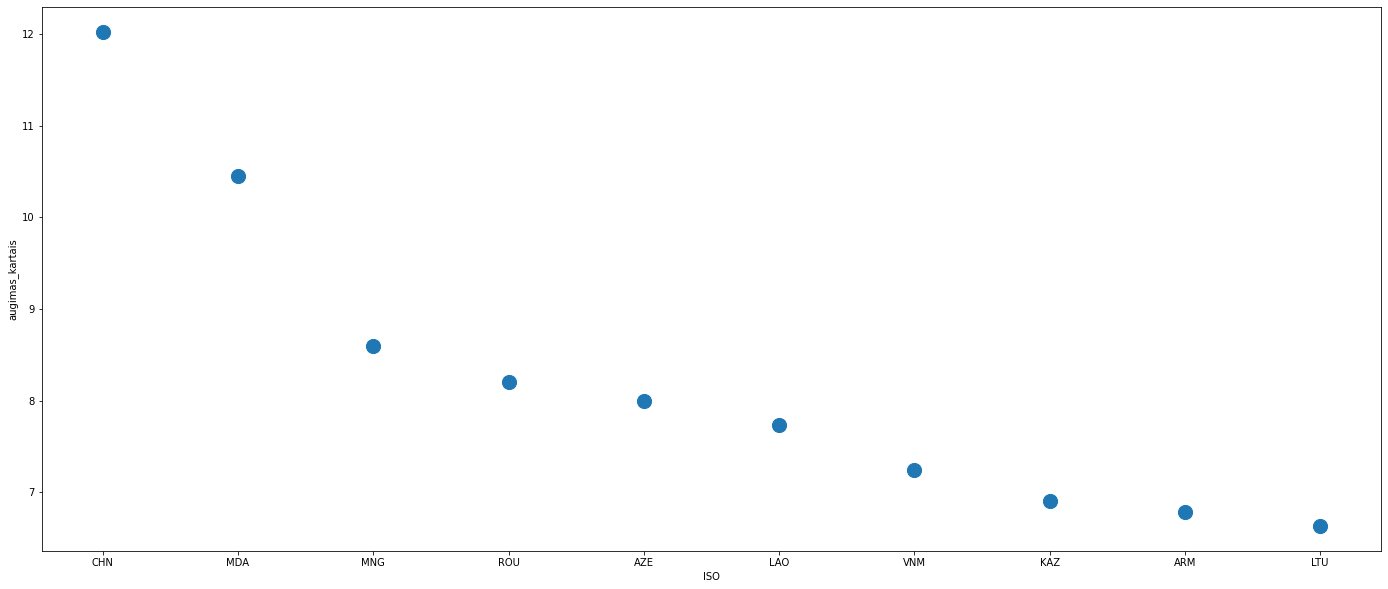

In [135]:
df.drop(df[df[2021] < 2000].index, inplace=True)
df_sorted = df.sort_values("augimas_kartais", ascending=False).head(10)

df_sorted.plot.scatter(x="ISO", y=("augimas_kartais"), s=200)
plt.show(100, 60)

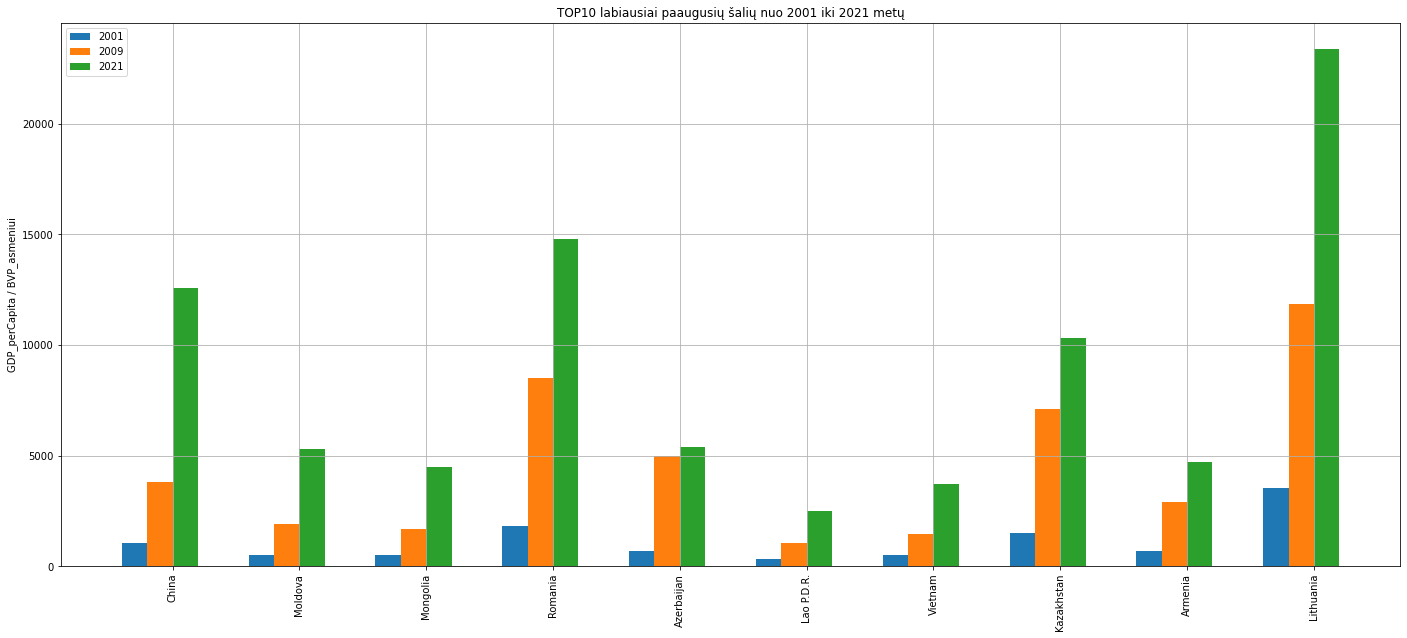

In [136]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(df_sorted.shape[0])

plt.bar(x_axis - 0.3, df_sorted[2001], 0.2, label="2001")
plt.bar(x_axis - 0.1, df_sorted[2009], 0.2, label="2009")
plt.bar(x_axis + 0.1, df_sorted[2021], 0.2, label="2021")

plt.grid()
# plt.yscale('log')
plt.xticks(x_axis, df_sorted["Country"], rotation=90)
plt.ylabel("GDP_perCapita / BVP_asmeniui")
plt.title("TOP10 labiausiai paaugusių šalių nuo 2001 iki 2021 metų")
plt.legend()
plt.show(50, 40)

In [117]:
df_sorted2 = df.sort_values("augimas_kartais", ascending=True).head(10)
df_sorted2

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,2001,2009,2021,augimas_kartais,augimas_sumine išraiška
8369,299,VEN,NGDPDPC,Venezuela,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,4963.92,9557.55,2157.32,0.434600,-2806.60
4365,672,LBY,NGDPDPC,Libya,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,6693.08,10202.81,5813.32,0.868557,-879.76
537,313,BHS,NGDPDPC,The Bahamas,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,27060.51,29296.49,28792.07,1.063988,1731.56
3749,158,JPN,NGDPDPC,Japan,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,34410.68,41469.77,39301.07,1.142118,4890.39
8105,466,ARE,NGDPDPC,United Arab Emirates,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,32621.29,30920.43,41205.21,1.263139,8583.92
801,339,BLZ,NGDPDPC,Belize,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,4409.66,5279.87,5638.40,1.278647,1228.74
273,213,ARG,NGDPDPC,Argentina,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,8085.36,8337.81,10616.95,1.313108,2531.59
4937,273,MEX,NGDPDPC,Mexico,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,7558.98,8029.3,10061.53,1.331070,2502.55
361,314,ABW,NGDPDPC,Aruba,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,20740.13,25134.77,28682.80,1.382961,7942.67
229,311,ATG,NGDPDPC,Antigua and Barbuda,"Gross domestic product per capita, current prices",GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units,10411.42,14688.68,14809.48,1.422427,4398.06


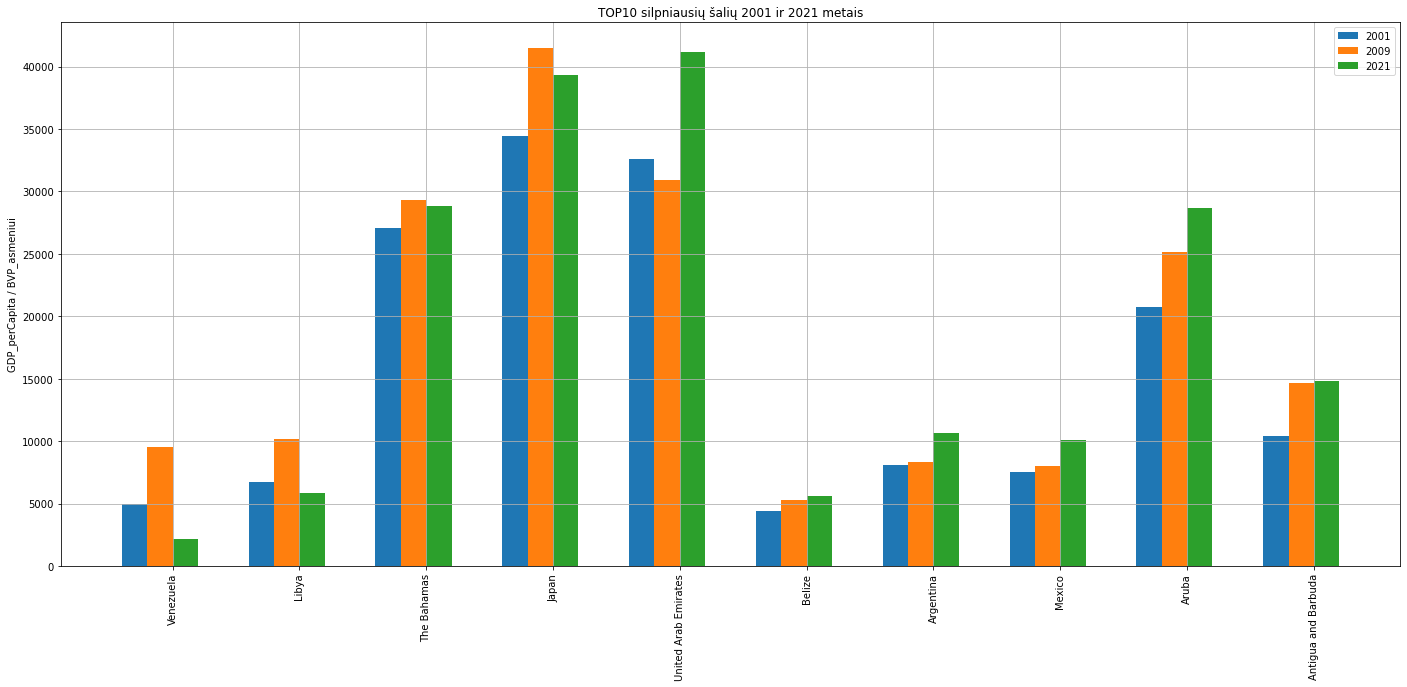

In [118]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(df_sorted.shape[0])

plt.bar(x_axis - 0.3, df_sorted2[2001], 0.2, label="2001")
plt.bar(x_axis - 0.1, df_sorted2[2009], 0.2, label="2009")
plt.bar(x_axis + 0.1, df_sorted2[2021], 0.2, label="2021")

plt.grid()
# plt.yscale('log')
plt.xticks(x_axis, df_sorted2["Country"], rotation=90)
plt.ylabel("GDP_perCapita / BVP_asmeniui")
plt.title("TOP10 silpniausių šalių 2001 ir 2021 metais")
plt.legend()
plt.show(60, 40)

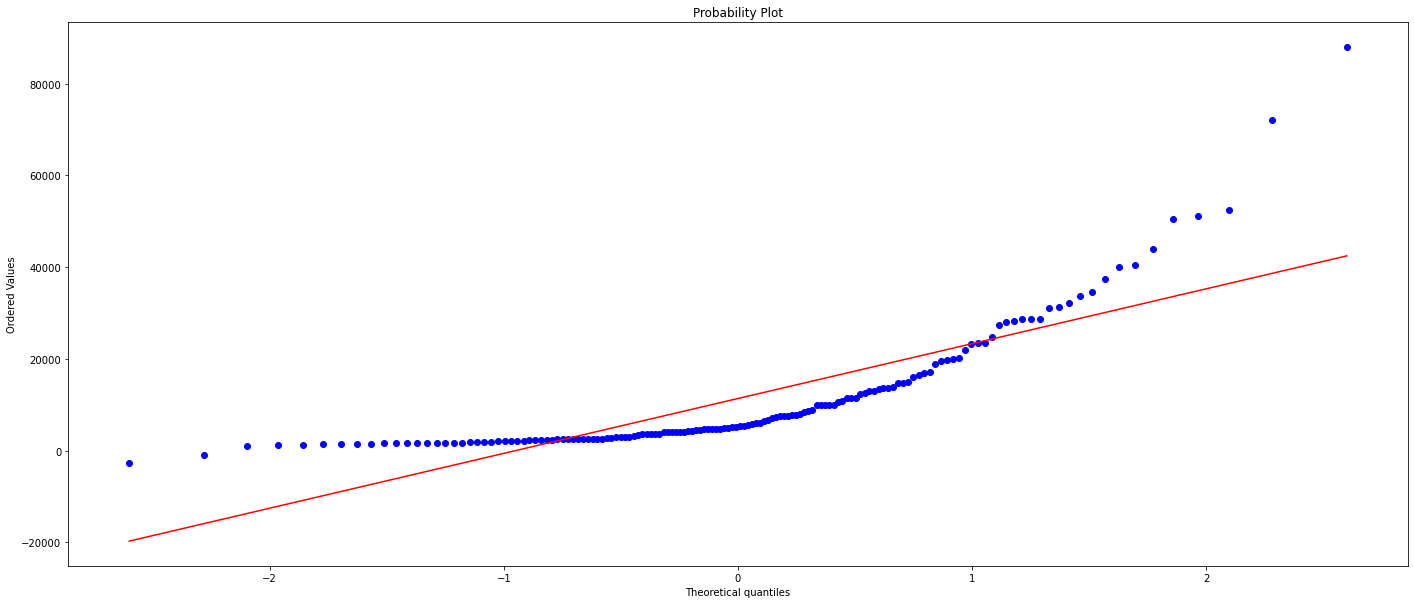

In [137]:
from scipy import stats

stats.probplot(df["augimas_sumine išraiška"], plot=plt)
plt.show()

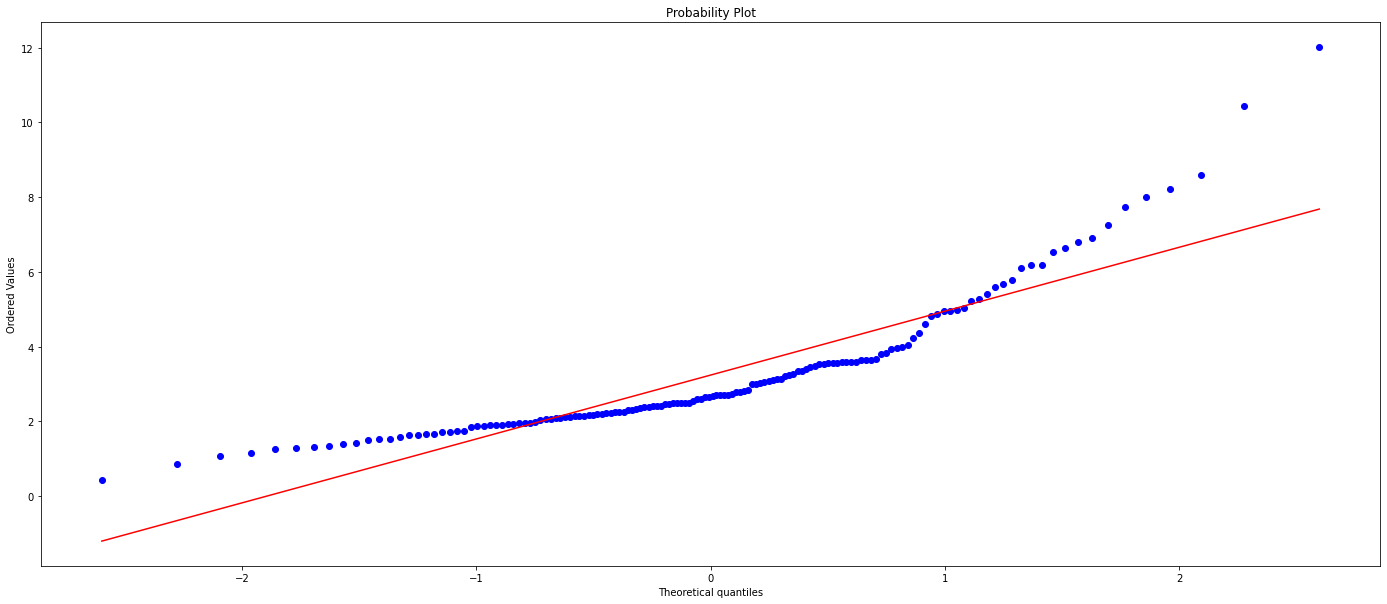

In [138]:
from scipy import stats

stats.probplot(df["augimas_kartais"], plot=plt)
plt.show()

### 5.2 Populiacija

In [59]:
df3 = data.copy()

In [60]:
df2 = data.copy()

In [61]:
df2 = df2[~(df2["WEO Subject Code"] == "LP")].index
pop = df3.drop(df2)

In [62]:
pop

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
26,512,AFG,LP,Afghanistan,Population,"For census purposes, the total population of t...",Persons,Millions,Source: Source: Afghan authorities. Latest act...,NaN,...,32.2,32.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
70,914,ALB,LP,Albania,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office. INSTAT Lat...,2.672,...,2.881,2.878,2.873,2.866,2.858,2.85,2.84,2.831,2.821,2020.0
114,612,DZA,LP,Algeria,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,18.666,...,43.424,43.851,44.462,45.082,45.71,46.347,46.993,47.648,48.313,2019.0
158,171,AND,LP,Andorra,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,NaN,...,0.078,0.078,0.08,0.081,0.083,0.084,0.086,0.088,0.089,2021.0
202,614,AGO,LP,Angola,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,8.91,...,30.128,31.031,31.962,32.921,33.909,34.926,35.974,37.053,38.165,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,582,VNM,LP,Vietnam,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,54.18,...,96.484,97.583,98.499,99.403,100.285,101.137,101.951,102.725,103.46,2020.0
8474,487,WBG,LP,West Bank and Gaza,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,NaN,...,4.977,5.101,5.227,5.35,5.474,5.599,5.723,5.848,5.973,2021.0
8518,474,YEM,LP,Yemen,Population,"For census purposes, the total population of t...",Persons,Millions,"Source: United Nations, Department of Economic...",NaN,...,29.58,30.245,30.911,31.576,32.239,32.901,33.561,34.218,34.873,2018.0
8562,754,ZMB,LP,Zambia,Population,"For census purposes, the total population of t...",Persons,Millions,Source: International Financial Institution La...,5.907,...,18.321,18.882,19.456,20.043,20.643,21.259,21.892,22.543,23.21,2019.0


In [63]:
n_columns = [
    "Country/Series-specific Notes",
    1980,
    1981,
    1982,
    1983,
    1984,
    1985,
    1986,
    1987,
    1988,
    1989,
    1990,
    1991,
    1992,
    1993,
    1994,
    1995,
    1996,
    1997,
    1998,
    1999,
    2000,
    2022,
    2023,
    2024,
    2025,
    2026,
    2026,
    2027,
    "Estimates Start After",
]
pop.drop(n_columns, inplace=True, axis=1)

In [64]:
pop


,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
26,512,AFG,LP,Afghanistan,Population,"For census purposes, the total population of t...",Persons,Millions,NaN,18.707,...,25.864,26.736,27.601,28.425,29.2,29.7,31.6,32.2,32.941,NaN
70,914,ALB,LP,Albania,Population,"For census purposes, the total population of t...",Persons,Millions,3.06,3.051,...,2.9,2.895,2.889,2.881,2.876,2.884,2.883,2.881,2.878,2.873
114,612,DZA,LP,Algeria,Population,"For census purposes, the total population of t...",Persons,Millions,30.954,31.414,...,37.495,38.297,39.114,39.963,40.836,41.721,42.578,43.424,43.851,44.462
158,171,AND,LP,Andorra,Population,"For census purposes, the total population of t...",Persons,Millions,NaN,NaN,...,0.07,0.07,0.071,0.072,0.073,0.075,0.076,0.078,0.078,0.08
202,614,AGO,LP,Angola,Population,"For census purposes, the total population of t...",Persons,Millions,17.637,18.166,...,24.414,25.147,25.901,26.681,27.503,28.377,29.25,30.128,31.031,31.962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,582,VNM,LP,Vietnam,Population,"For census purposes, the total population of t...",Persons,Millions,80.469,81.534,...,88.809,89.76,90.729,91.713,92.695,93.672,94.666,96.484,97.583,98.499
8474,487,WBG,LP,West Bank and Gaza,Population,"For census purposes, the total population of t...",Persons,Millions,3.138,3.225,...,4.226,4.328,4.429,4.53,4.632,4.733,4.854,4.977,5.101,5.227
8518,474,YEM,LP,Yemen,Population,"For census purposes, the total population of t...",Persons,Millions,18.39,18.919,...,24.91,25.576,26.246,26.916,27.584,28.25,28.915,29.58,30.245,30.911
8562,754,ZMB,LP,Zambia,Population,"For census purposes, the total population of t...",Persons,Millions,10.861,11.14,...,14.787,15.246,15.721,16.212,16.717,17.238,17.773,18.321,18.882,19.456


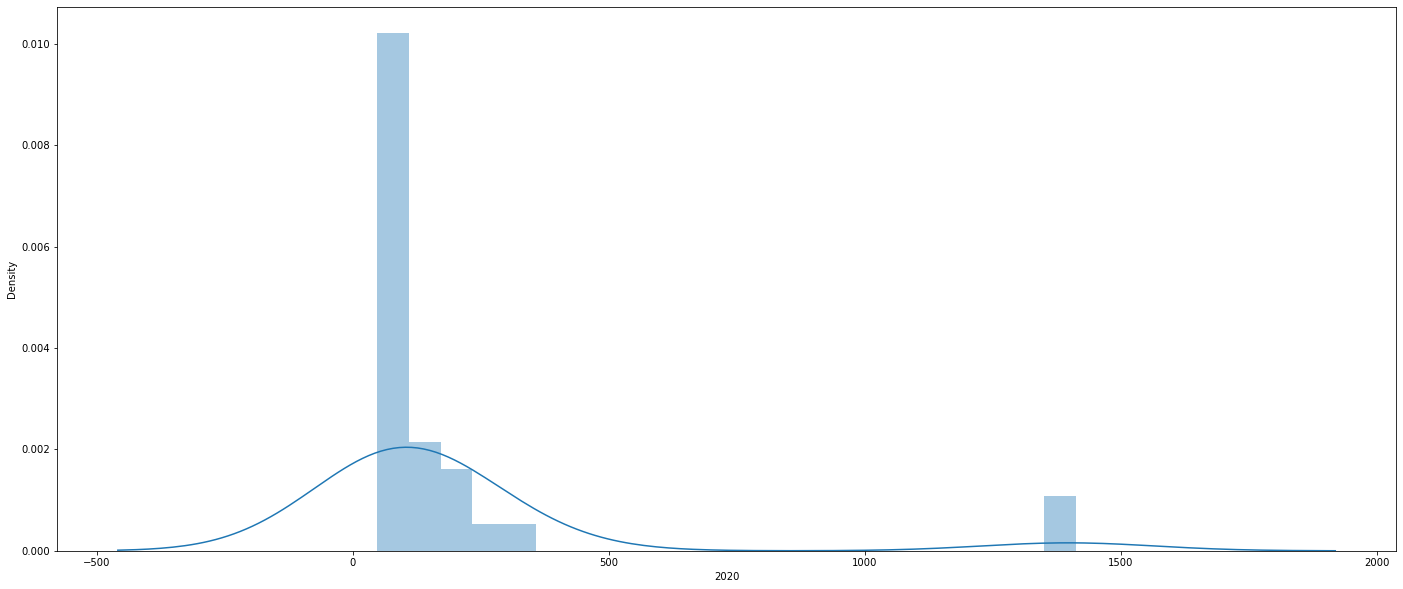

In [139]:
sns.distplot(pop[2020])
plt.show()

In [97]:
pop.shape

(196, 29)

<AxesSubplot:xlabel='WEO Country Code', ylabel='2020'>

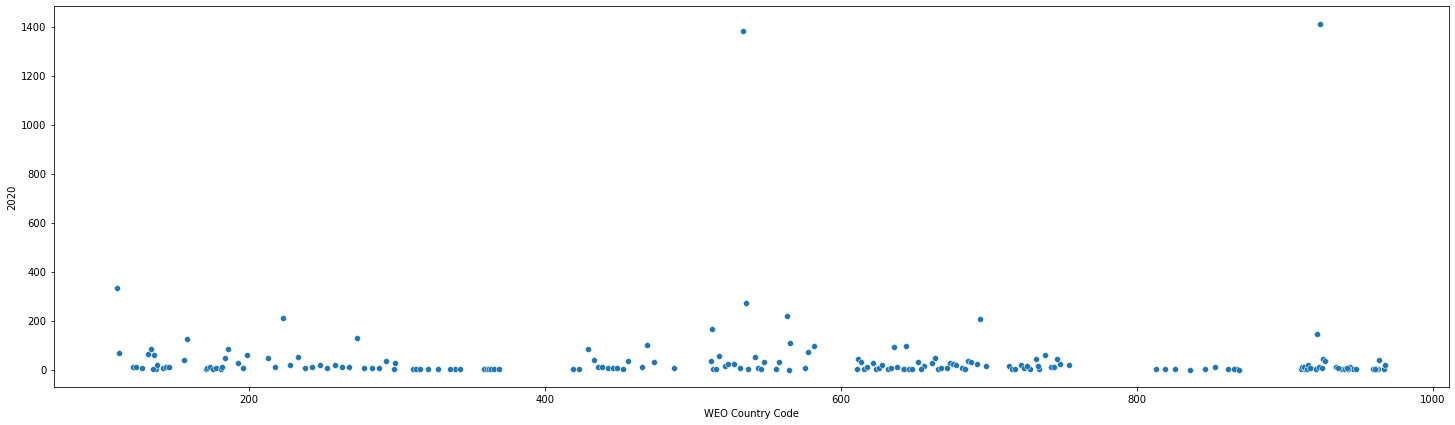

In [65]:
sns.scatterplot(pop['WEO Country Code'],pop[2020])

In [75]:
pop = pop.sort_values(2020, ascending=False).head(30)
pop

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1610,924,CHN,LP,China,Population,"For census purposes, the total population of t...",Persons,Millions,1276.27,1284.53,...,1359.22,1367.26,1376.46,1383.26,1392.32,1400.11,1405.41,1410.08,1412.12,1412.6
3414,534,IND,LP,India,Population,"For census purposes, the total population of t...",Persons,Millions,1075,1093.32,...,1265.78,1280.84,1295.6,1310.15,1324.52,1338.68,1352.64,1366.42,1380,1393.41
8210,111,USA,LP,United States,Population,"For census purposes, the total population of t...",Persons,Millions,285.216,288.019,...,314.167,316.331,318.619,320.926,323.221,325.28,327.023,328.547,331.234,332.183
3458,536,IDN,LP,Indonesia,Population,"For census purposes, the total population of t...",Persons,Millions,209.206,212.19,...,245.425,248.818,252.165,255.588,258.497,261.356,264.162,266.912,270.204,272.249
5790,564,PAK,LP,Pakistan,Population,"For census purposes, the total population of t...",Persons,Millions,145.17,148.07,...,185.04,188.78,192.57,196.37,200.19,205.17,209.75,213.95,218.24,222.59
1082,223,BRA,LP,Brazil,Population,"For census purposes, the total population of t...",Persons,Millions,176.209,178.499,...,198.315,200.004,201.718,203.476,205.157,206.805,208.495,210.147,211.756,212.609
5614,694,NGA,LP,Nigeria,Population,"For census purposes, the total population of t...",Persons,Millions,125.394,128.596,...,167.229,171.766,176.405,181.137,185.96,190.873,195.875,200.964,206.14,211.401
642,513,BGD,LP,Bangladesh,Population,"For census purposes, the total population of t...",Persons,Millions,130.089,132.478,...,151.008,152.765,154.52,156.256,157.971,159.671,161.356,163.046,164.689,166.657
6318,922,RUS,LP,Russia,Population,"For census purposes, the total population of t...",Persons,Millions,145.649,144.964,...,143.347,143.667,146.267,146.545,146.804,146.88,146.781,146.749,146.171,145.558
4954,273,MEX,LP,Mexico,Population,"For census purposes, the total population of t...",Persons,Millions,100.105,101.494,...,116.936,118.454,119.936,121.348,122.715,124.042,125.328,126.578,127.792,128.972


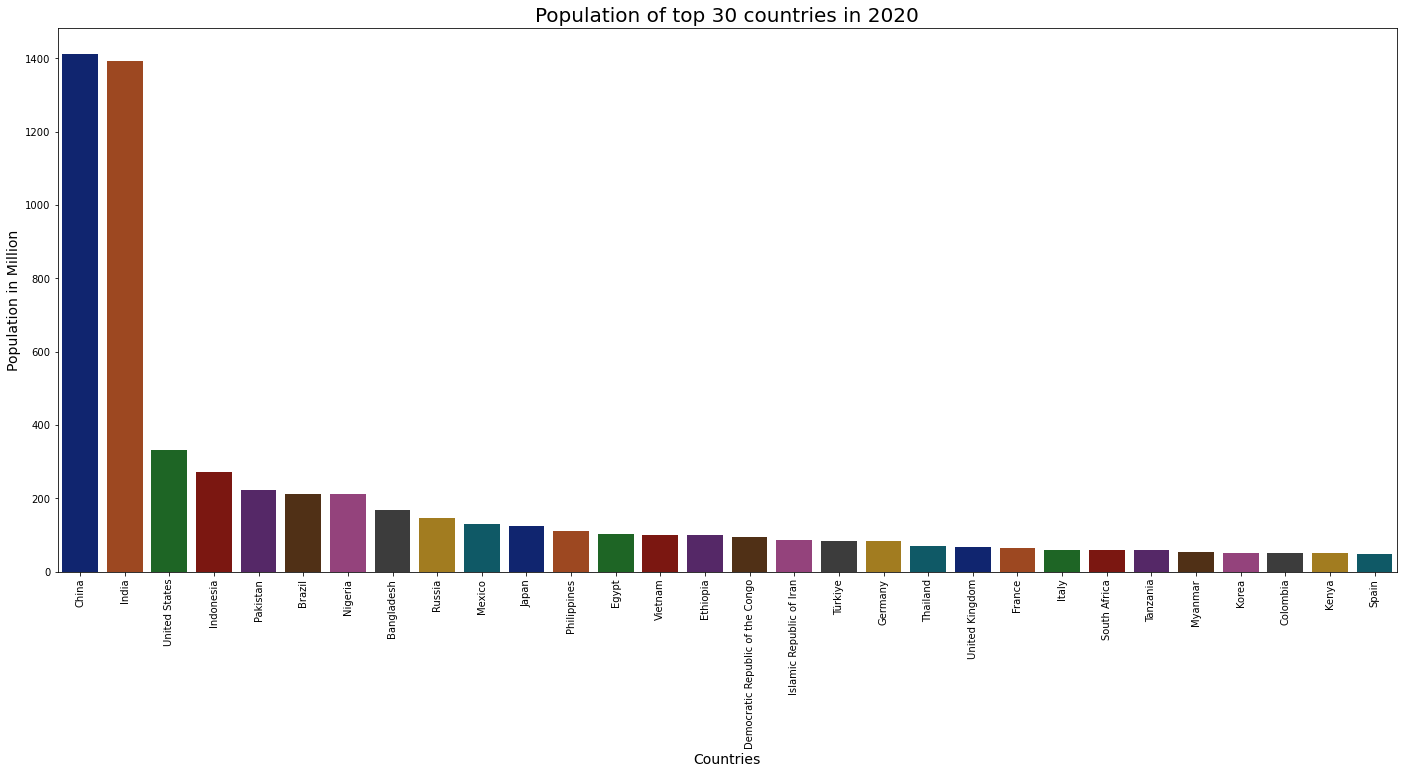

In [80]:
# 2020 population data
# pop = pop[2020][:30]

plt.rcParams["figure.figsize"] = (24, 10)
ax = sns.barplot(x=pop["Country"], y=pop[2021], palette="dark")
ax.set_xlabel(xlabel="Countries", fontsize=14)
ax.set_ylabel(ylabel="Population in Million", fontsize=14)
ax.set_title(label="Population of top 30 countries in 2020", fontsize=20)
plt.xticks(rotation=90)
plt.show()